In [ ]:
!tar -xvzf vlcs.tar.gz

In [27]:
import gc
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [35]:
class DataLoader:
    def __init__(self, datasettype='train'):
        self.X = []
        self.Y = []
        X1, Y1 = [], []
        d_type = 'train'
        if datasettype != 'train':
          d_type = 'test'

        caltech_dir = f"./VLCS/CALTECH/{d_type}/"
        caltech = os.listdir(caltech_dir)
        for i, dir_name in enumerate(caltech):
            path = f"./VLCS/CALTECH/{d_type}/{dir_name}"
            images = os.listdir(path)
            for name in images:
                image_path = f"./VLCS/CALTECH/{d_type}/{dir_name}/{name}"
                image = img_to_array(load_img(image_path, target_size=(227, 227)))
                X1.append(image)
                Y1.append(i)
        X1 = np.array(X1)
        Y1 = np.array(Y1)
        self.X=X1
        self.Y=Y1

        del X1,Y1
        gc.collect()

    def __call__(self):
      for i in range(self.Y.shape[0]):
            yield self.X[i],[self.Y[i]]

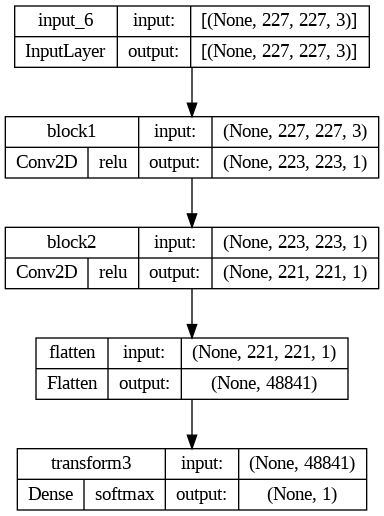

In [36]:
layer_input = tf.keras.layers.Input(shape=(227, 227, 3))
_layer = tf.keras.layers.Conv2D(1, (5, 5), activation='relu', name='block1')(layer_input)
_layer = tf.keras.layers.Conv2D(1, (3, 3), activation='relu', name='block2')(_layer)
_layer = tf.keras.layers.Flatten(name='flatten')(_layer)
_layer = tf.keras.layers.Dense(1, activation='softmax', name='transform3')(_layer)
model = tf.keras.models.Model(inputs=layer_input, outputs=_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [37]:
train_loader = DataLoader('train')
train_dataset = tf.data.Dataset.from_generator(train_loader, output_types = (tf.int16, tf.int16), output_shapes=(tf.TensorShape([227, 227, 3]), tf.TensorShape(1)))
train_batches = train_dataset.batch(16)

(891, 227, 227, 3) (891,)


In [31]:
# val_loader = DataLoader('valid')
# val_dataset = tf.data.Dataset.from_generator(val_loader, output_types = (tf.int16, tf.int16), output_shapes=(tf.TensorShape([227, 227, 3]), tf.TensorShape(1)))
# val_batches = val_dataset.batch(16)

(424, 227, 227, 3) (424,)


In [38]:
test_loader = DataLoader('test')
test_dataset = tf.data.Dataset.from_generator(test_loader, output_types = (tf.int16, tf.int16), output_shapes=(tf.TensorShape([227, 227, 3]), tf.TensorShape(1)))
test_batches = test_dataset.batch(16)
print(test_batches)

(424, 227, 227, 3) (424,)
<_BatchDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.int16, name=None), TensorSpec(shape=(None, 1), dtype=tf.int16, name=None))>


In [39]:
model.fit(train_batches, epochs=3)

Epoch 1/3
56/56 [==============================] - 26s 449ms/step - loss: 0.0000e+00 - accuracy: 0.0842
Epoch 2/3
56/56 [==============================] - 25s 439ms/step - loss: 0.0000e+00 - accuracy: 0.0842
Epoch 3/3
56/56 [==============================] - 27s 474ms/step - loss: 0.0000e+00 - accuracy: 0.0842


In [40]:
model.evaluate(test_batches)

27/27 [==============================] - 5s 182ms/step - loss: 0.0000e+00 - accuracy: 0.0825


[0.0, 0.08254717290401459]

In [41]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
